In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\91779\Downloads\homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
13,1100,2,40.00
11,2785,4,140.00
19,800,1,32.00
12,1000,2,38.00


In [14]:
type(df.price.values),type(df.price)

(numpy.ndarray, pandas.core.series.Series)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_scaled  = scaler_x.fit_transform(df.drop(['price'],axis = 1))
y_scaled = scaler_y.fit_transform(df.price.values.reshape(df.shape[0],1))

In [15]:
x_scaled,y_scaled

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [16]:
np.ones(shape=(2))

array([1., 1.])

In [51]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    no_of_features=x.shape[1]
    w = np.ones(shape = (no_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w,x_scaled.T) + b
        cost = np.mean(np.square(y_true-y_pred))#using mse
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        if i%10==0:
            epoch_list.append(i)
            cost_list.append(cost)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

Text(0, 0.5, 'cost')

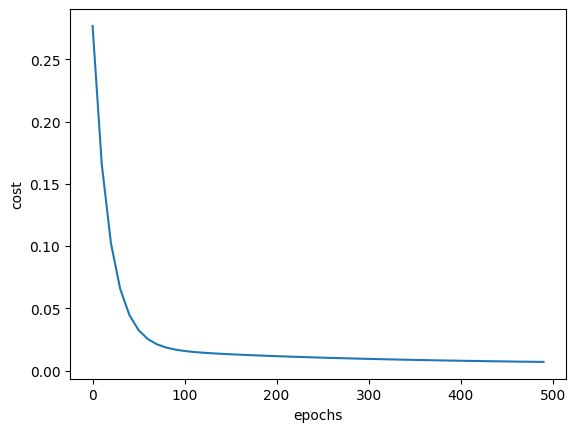

In [26]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,cost_list)
plt.xlabel("epochs")
plt.ylabel('cost')

In [35]:
def predict(area,bedroom,w,b):
    scaled_x = scaler_x.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return scaler_y.inverse_transform([[scaled_price]])[0][0]

In [36]:
predict(2600,4,w,b)

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [67]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    no_of_features=x.shape[1]
    w = np.ones(shape = (no_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = np.random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w,sample_x.T) + b
        cost = np.square(sample_y-y_pred)#using mse
        w_grad = -(2/1)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/1)*np.sum(sample_y-y_pred)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        if i%100==0:
            epoch_list.append(i)
            cost_list.append(cost)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.78767373, 0.42659633]), -0.1377479325194669, 0.0005693854348769417)

Text(0, 0.5, 'cost')

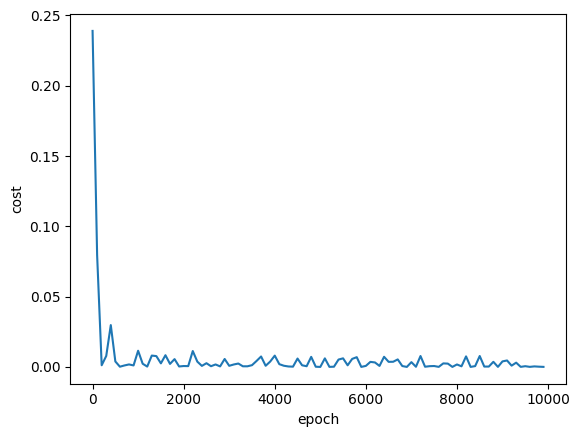

In [68]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.xlabel('epoch')
plt.ylabel('cost')

In [69]:
predict(2600,4,w_sgd,b_sgd)

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


122.59853368710718

In [75]:
def minibatch_gradient_descent(x,y_true,batch_size=5,epochs=100,learning_rate=0.01):
    no_of_features=x.shape[1]
    w = np.ones(shape = (no_of_features))
    b = 0
    total_samples = x.shape[0]

    if batch_size>total_samples:
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]

        xj = x_tmp[0:batch_size]
        yj = y_tmp[0:batch_size]
        
        y_pred = np.dot(w,xj.T) + b
        cost = np.mean(np.square(yj-y_pred))#using mse
        w_grad = -(2/len(xj))*(xj.T.dot(yj-y_pred))
        b_grad = -(2/len(xj))*np.sum(yj-y_pred)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        if i%10==0:
            epoch_list.append(i)
            cost_list.append(cost)
    return w, b, cost, cost_list, epoch_list

w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = minibatch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),batch_size=5,epochs=500)
w_mini,b_mini,cost_mini

(array([0.70238936, 0.67291903]), -0.2299360383588513, 0.005994895175484889)

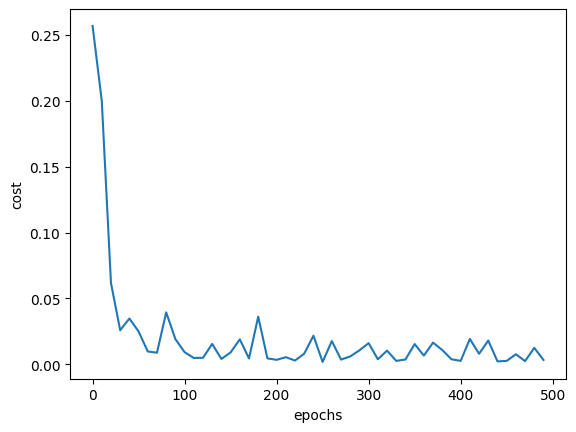

In [76]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_mini,cost_list_mini)


In [77]:
predict(2600,4,w_mini,b_mini)

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.94707063604265

In [78]:
predict(1000,2,w_mini,b_mini)

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.20913913153852

In [79]:
predict(1500,3,w_mini,b_mini)

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.26887416265627